**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

 **Read the Dataset**



In [ ]:
data=pd.read_excel("Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Descriptive Statistical**

In [ ]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
categorical=['Airline','Source','Destination','Additional_Info']
categorical

['Airline', 'Source', 'Destination', 'Additional_Info']

**Data Preparation**

Checking Unique values

In [ ]:
for i in categorical:
  print(i, data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


Split the data column

In [ ]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [ ]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

Check the maximum number of Stops

In [ ]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

Split the Values

In [ ]:
data.Route=data.Route.str.split('→')
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object

In [ ]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [ ]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [ ]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [ ]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')

In [ ]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [ ]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [ ]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [ ]:
data.Duration=data.Duration.str.split(' ')

In [ ]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]

data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

Replace non-stop flights with 0 value

In [ ]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [ ]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
data.Additional_Info.replace('No Info','No Info',inplace=True)

Check the null values

In [ ]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins           1032
dtype: int64

Drop the columns

In [ ]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [ ]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

Check the null values

In [ ]:
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   1
City2                   1
City3                3492
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

**Replacing missing values**

In [ ]:
data['City1'].fillna('None',inplace=True)
data['City2'].fillna('None',inplace=True)
data['City3'].fillna('None',inplace=True)
data['Total_Stops'].fillna('None',inplace=True)

In [ ]:
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [ ]:
data['Travel_Mins'].fillna(0,inplace=True)

Check the info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10683 non-null  object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date               10683 non-null  object
 7   Month              10683 non-null  object
 8   Year               10683 non-null  object
 9   City1              10683 non-null  object
 10  City2              10683 non-null  object
 11  City3              10683 non-null  object
 12  Dep_Time_Hour      10683 non-null  object
 13  Dep_Time_Mins      10683 non-null  object
 14  Arrival_date       10683 non-null  object
 15  Arrival_Time_Hour  10683 non-null  object
 16  Arrival_Time_Mins  10683 non-null  objec

Change the Datatype

In [ ]:
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Mins=data.Arrival_Time_Hour.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')

In [ ]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,BOM,GOI,PNQ,16,50,6,16,16,5m,0


In [ ]:
data.drop(index=6474,inplace=True,axis=0)

In [ ]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [ ]:
categorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins']

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,5,8,3897,24,3,2019,0,13,29,22,20,22,1,1,2,50
1,1,3,0,1,8,7662,1,5,2019,2,25,1,5,50,1,13,13,7,25
2,4,2,1,1,8,13882,9,6,2019,3,32,4,9,25,10,4,4,19,0
3,3,3,0,0,8,6218,12,5,2019,2,34,3,18,5,12,23,23,5,25
4,3,0,5,0,8,13302,1,3,2019,0,34,8,16,50,1,21,21,4,45


In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,5,8,3897,24,3,2019,0,13,29,22,20,22,1,1,2,50
1,1,3,0,1,8,7662,1,5,2019,2,25,1,5,50,1,13,13,7,25
2,4,2,1,1,8,13882,9,6,2019,3,32,4,9,25,10,4,4,19,0
3,3,3,0,0,8,6218,12,5,2019,2,34,3,18,5,12,23,23,5,25
4,3,0,5,0,8,13302,1,3,2019,0,34,8,16,50,1,21,21,4,45


**Output Columns**

In [ ]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,5,8,3897,24,3,2019,0,13,29,22,20,22,1,1,2,50
1,1,3,0,1,8,7662,1,5,2019,2,25,1,5,50,1,13,13,7,25
2,4,2,1,1,8,13882,9,6,2019,3,32,4,9,25,10,4,4,19,0
3,3,3,0,0,8,6218,12,5,2019,2,34,3,18,5,12,23,23,5,25
4,3,0,5,0,8,13302,1,3,2019,0,34,8,16,50,1,21,21,4,45


 **Descriptive statistical**

**Visual analysis**

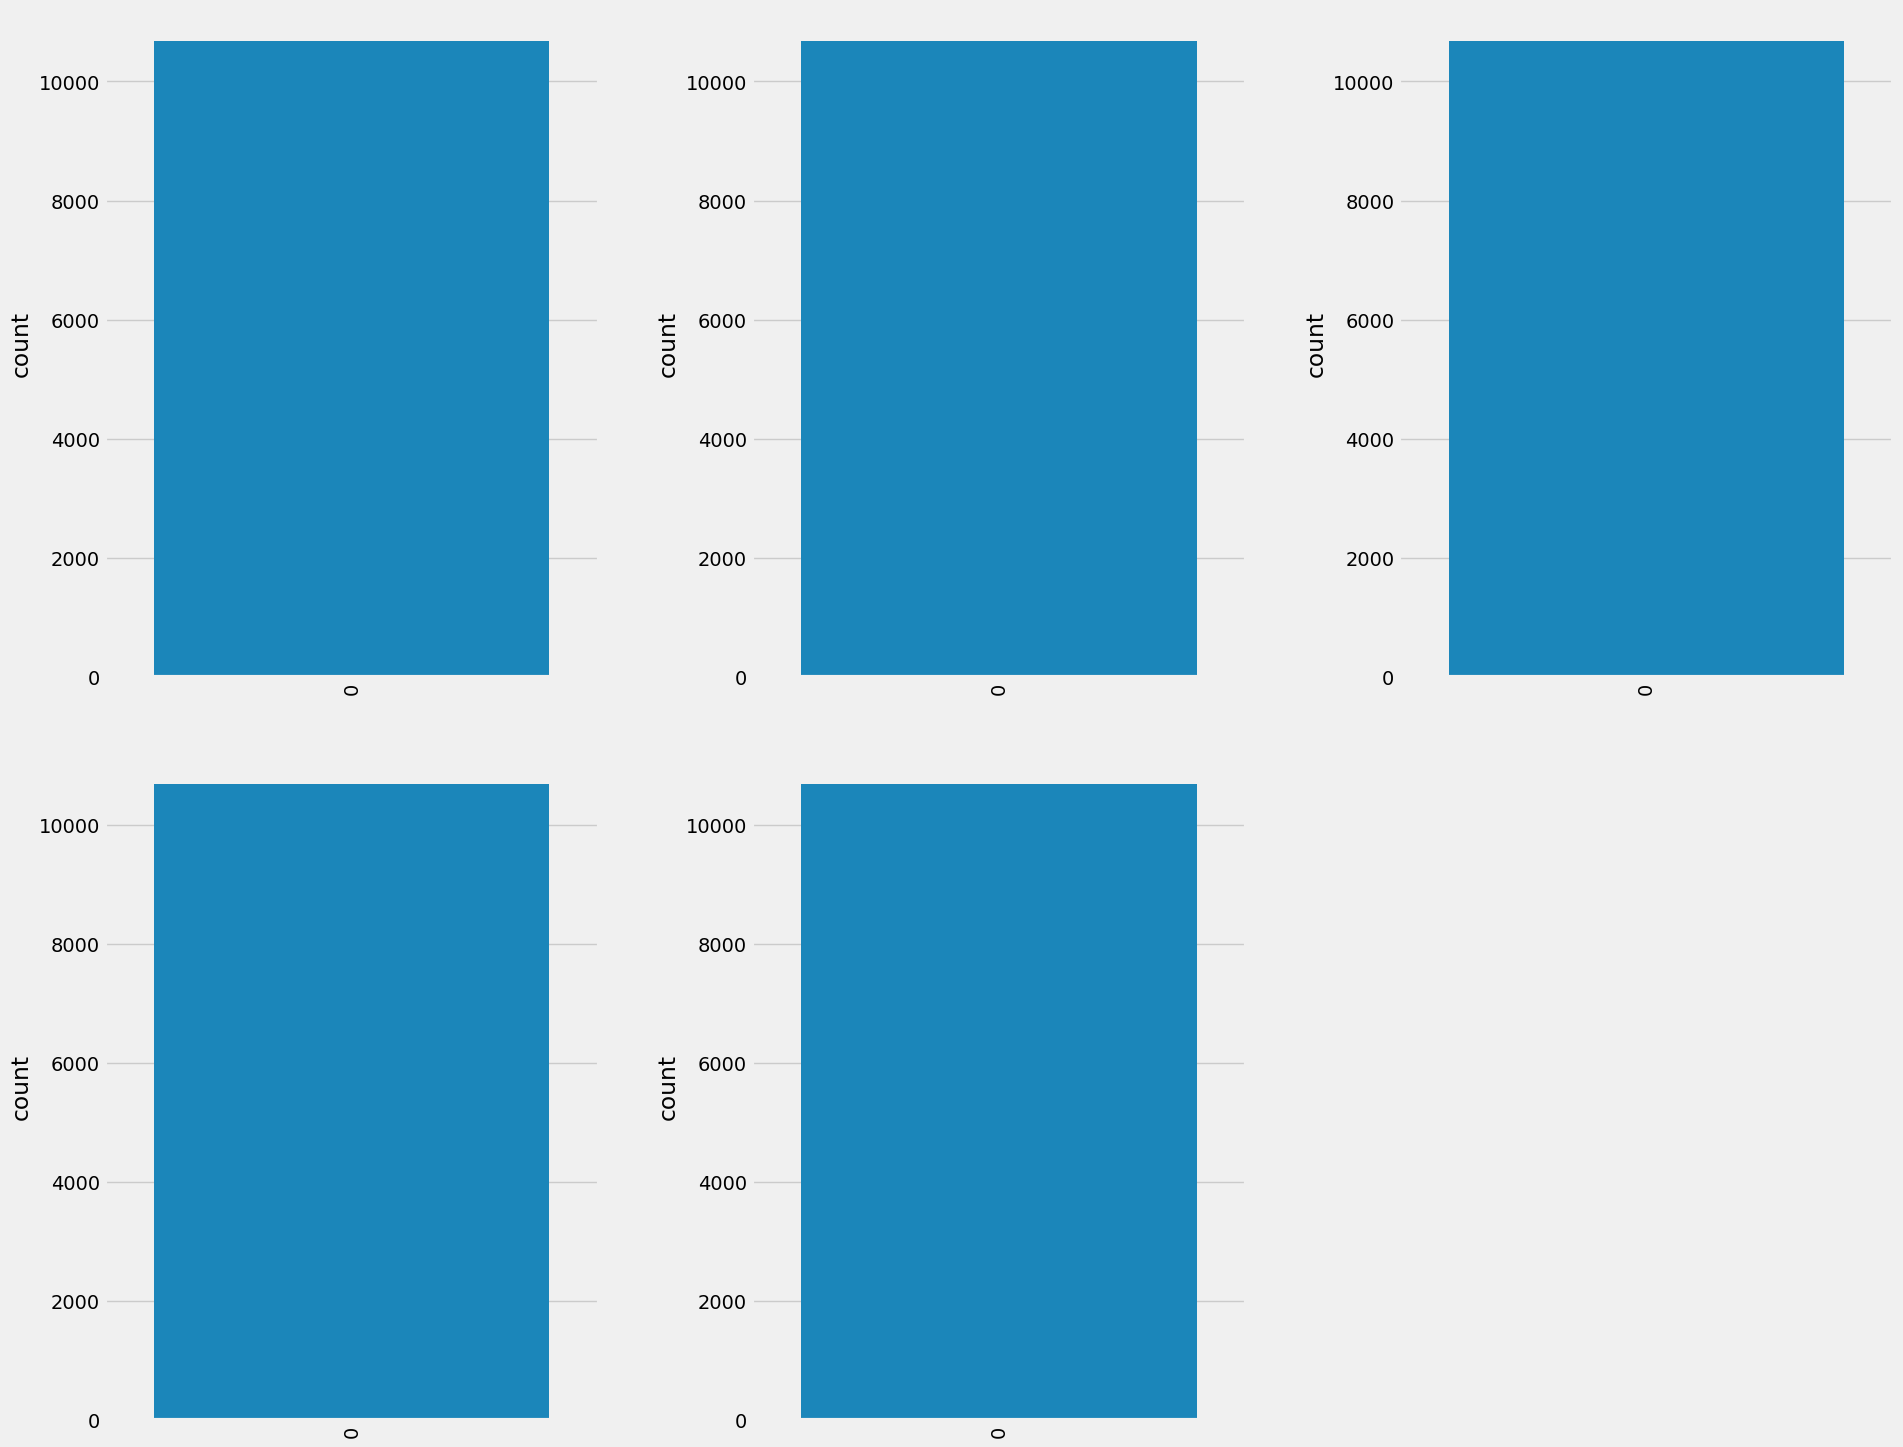

In [ ]:
c=1
plt.figure(figsize=(20,45))

for i in categorical:
  plt.subplot(6,3,c)
  sns.countplot(data[i])
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  c=c+1

plt.show()

**Distribution of 'PRICE' Column**

<Figure size 1500x800 with 0 Axes>

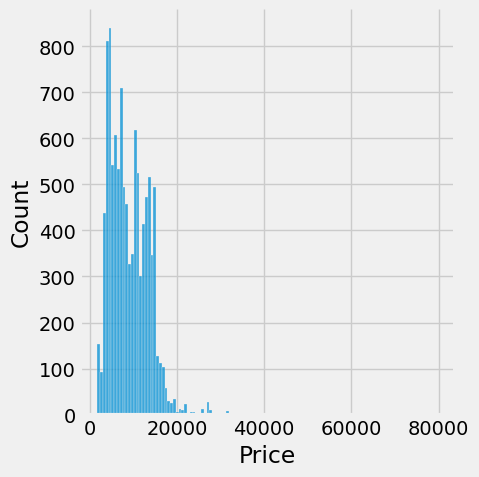

In [ ]:
plt.figure(figsize=(15,8))
sns.displot(data.Price)

**output column**

In [ ]:
data=data[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Price']]

In [ ]:
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,22,1,1,3897
1,1,3,0,1,5,2019,5,50,1,13,13,7662
2,4,2,1,9,6,2019,9,25,10,4,4,13882
3,3,3,0,12,5,2019,18,5,12,23,23,6218
4,3,0,5,1,3,2019,16,50,1,21,21,13302


**Checking the Correlation using HeatMap**

In [ ]:
data['Year'].max()

2019

<Axes: >

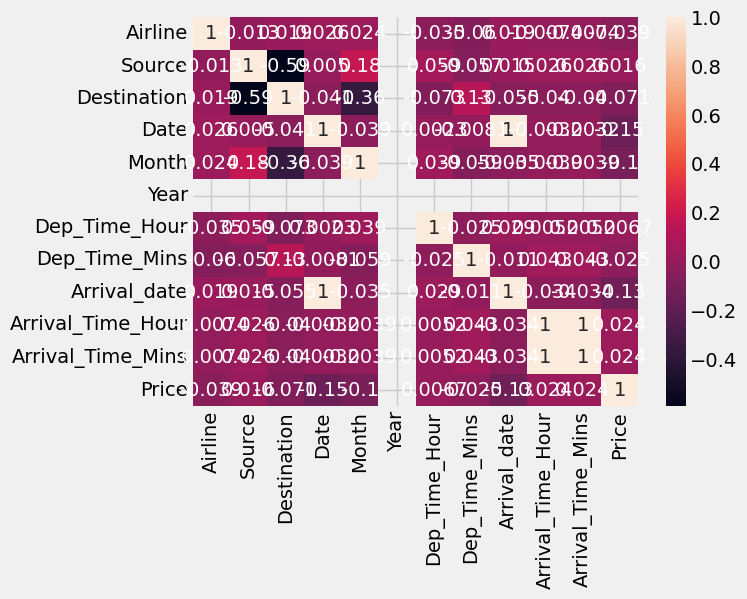

In [ ]:
sns.heatmap(data.corr(),annot=True)

**Outier Detection for 'Price' Column**

<Axes: >

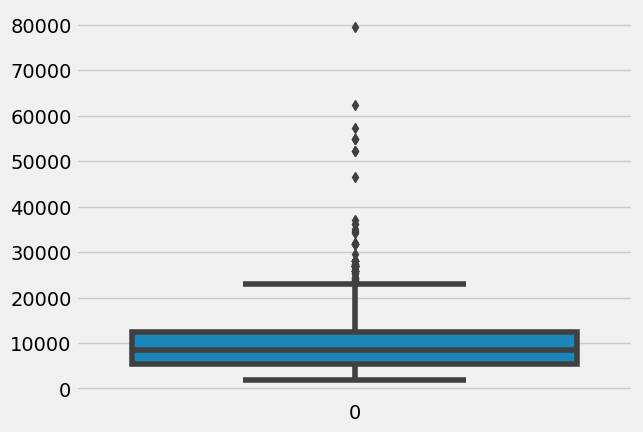

In [ ]:
import seaborn as sns
sns.boxplot(data['Price'])

Scaling the Data

In [ ]:
y=data['Price']
x=data.drop(columns=['Price'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [ ]:
x_scaled=ss.fit_transform(x)

In [ ]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
0,-0.410805,-1.658435,2.416778,1.237288,-1.467707,0.0,1.654268,-0.234932,0.955750,-1.800319,-1.800319
1,-1.261152,0.890299,-0.973732,-1.475307,0.250153,0.0,-1.303000,1.363674,-1.524648,-0.050813,-0.050813
2,0.014369,0.040721,-0.295630,-0.531796,1.109082,0.0,-0.607172,0.031502,-0.461621,-1.362943,-1.362943
3,-0.410805,0.890299,-0.973732,-0.177979,0.250153,0.0,0.958440,-1.034235,-0.225392,1.407109,1.407109
4,-0.410805,-1.658435,2.416778,-1.475307,-1.467707,0.0,0.610527,1.363674,-1.524648,1.115525,1.115525


Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
10005,6,2,1,27,5,2019,8,30,27,19,19
3684,4,2,1,9,5,2019,11,30,10,12,12
1034,8,2,1,24,4,2019,15,45,24,22,22
3909,6,2,1,21,3,2019,12,50,22,1,1
3088,1,2,1,24,6,2019,17,15,25,19,19


**Using Ensemble Technique**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

for i in [rfr,gb,ad]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score(y_test,y_pred)
  train_score=r2_score(y_train,i.predict(x_train))
  if abs(train_score-test_score)<=0.2:
    print(i)

    print("R2 score is",r2_score(y_test,y_pred))
    print("R2 for train data",r2_score(y_train,i.predict(x_train)))
    print("Mean Absolute Error is",mean_absolute_error(y_pred,y_test))
    print("Mean Squared Error is",mean_squared_error(y_pred,y_test))
    print("Root Mean Squared Error is",(mean_squared_error(y_pred,y_test,squared=False)))


RandomForestRegressor()
R2 score is 0.842365567797473
R2 for train data 0.9474542673910785
Mean Absolute Error is 1228.274204558453
Mean Squared Error is 3332237.719939765
Root Mean Squared Error is 1825.4417876064317
GradientBoostingRegressor()
R2 score is 0.7659833383730531
R2 for train data 0.730149720400205
Mean Absolute Error is 1687.4812441090107
Mean Squared Error is 4946883.343137974
Root Mean Squared Error is 2224.1590193009974
AdaBoostRegressor()
R2 score is 0.36570072724523117
R2 for train data 0.34990682273467855
Mean Absolute Error is 3037.115755822542
Mean Squared Error is 13408466.239712307
Root Mean Squared Error is 3661.7572611674177


**Regression Model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()

for i in [knn,svr,dt]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score(y_test,y_pred)
  train_score=r2_score(y_train,i.predict(x_train))
  if abs(train_score-test_score)<=0.1:
    print(i)

    print("R2 score is",r2_score(y_test,y_pred))
    print("R2 for train data",r2_score(y_train,i.predict(x_train)))
    print("Mean Absolute Error is",mean_absolute_error(y_test,y_pred))
    print("Mean Squared Error is",mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error is",(mean_squared_error(y_test,y_pred,squared=False)))

SVR()
R2 score is -0.03013111523471812
R2 for train data -0.023072501115390276
Mean Absolute Error is 3629.626247681
Mean Squared Error is 21775964.240214497
Root Mean Squared Error is 4666.4723550252065


**Checking Cross Validation for RandomForestRegressor**

In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
  cv=cross_val_score(rfr,x,y,cv=i)
  print(rfr,cv.mean())

RandomForestRegressor() 0.7831753962502619
RandomForestRegressor() 0.7884471863043524
RandomForestRegressor() 0.7898087304544702


**Hypertuning the model**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

rf_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [ ]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

gb_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

**Accuracy**

In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("train accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.927073752008462
train accuracy 0.7524142557354015


Checking Train and Test Accuracy by RandomSearchCV using KNN Model2

In [ ]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("train accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.8278803211792515
train accuracy 0.3768761884959687


**Evaluating performance of the model and saving the model**

In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("train accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.9229815843118069
train accuracy 0.7575464243348948


In [ ]:
price_list=pd.DataFrame(data.Price)

In [ ]:
price_list


,Price
0,3897
1,7662
2,13882
3,6218
4,13302
...,...
10678,4107
10679,4145
10680,7229
10681,12648


In [ ]:
import pickle 
pickle.dump(rfr,open('model1.pk1','wb'))

**Save the best model**

In [ ]:
import pickle
pickle.dump(rfr,open('model1.pk1','wb'))